In [16]:
install.packages("outliers")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
# Load the dataset
data <- read.csv("ar41_for_ulb_mini.csv")

In [2]:
# Data Type Conversion
data_split <- strsplit(as.character(data$X.mapped_veh_id.timestamps_UTC.lat.lon.RS_E_InAirTemp_PC1.RS_E_InAirTemp_PC2.RS_E_OilPress_PC1.RS_E_OilPress_PC2.RS_E_RPM_PC1.RS_E_RPM_PC2.RS_E_WatTemp_PC1.RS_E_WatTemp_PC2.RS_T_OilTemp_PC1.RS_T_OilTemp_PC2), ";")
data_df <- as.data.frame(do.call(rbind, data_split))
colnames(data_df) <- c("X","mapped_veh_id", "timestamps_UTC", "lat", "lon", "RS_E_InAirTemp_PC1", "RS_E_InAirTemp_PC2", "RS_E_OilPress_PC1", "RS_E_OilPress_PC2", "RS_E_RPM_PC1", "RS_E_RPM_PC2", "RS_E_WatTemp_PC1", "RS_E_WatTemp_PC2", "RS_T_OilTemp_PC1", "RS_T_OilTemp_PC2")
data_df <- subset(data_df, select = -X)
data_df$mapped_veh_id <- as.factor(data_df$mapped_veh_id)
data_df$timestamps_UTC <- as.POSIXct(data_df$timestamps_UTC, format = "%Y-%m-%d %H:%M:%S")
columns_to_convert <- c("lat", "lon","RS_E_InAirTemp_PC1", "RS_E_InAirTemp_PC2", "RS_E_OilPress_PC1", "RS_E_OilPress_PC2", "RS_E_RPM_PC1", "RS_E_RPM_PC2", "RS_E_WatTemp_PC1", "RS_E_WatTemp_PC2", "RS_T_OilTemp_PC1", "RS_T_OilTemp_PC2")
for (col in columns_to_convert) {
  data_df[, col] <- as.numeric(gsub(",", ".", data_df[, col]))
}

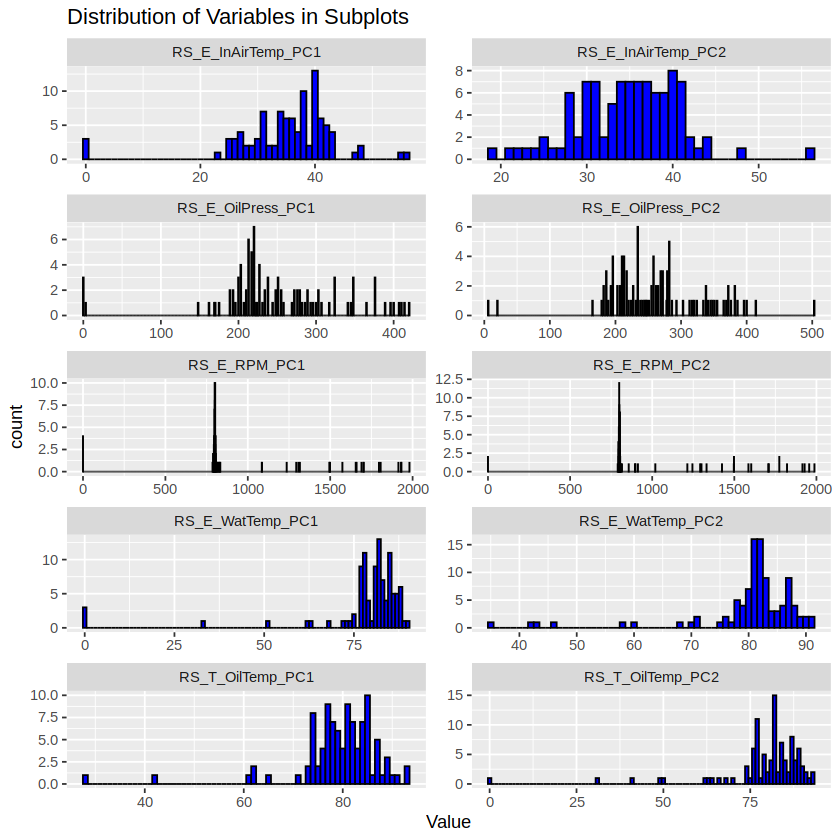

In [6]:
# Load the necessary libraries
library(ggplot2)
library(dplyr)
library(tidyr)  # Load the tidyr package

# Create subplots for variable distribution
selected_vars <- c("RS_E_InAirTemp_PC1", "RS_E_InAirTemp_PC2", "RS_E_OilPress_PC1", "RS_E_OilPress_PC2",
                   "RS_E_RPM_PC1", "RS_E_RPM_PC2", "RS_E_WatTemp_PC1", "RS_E_WatTemp_PC2",
                   "RS_T_OilTemp_PC1", "RS_T_OilTemp_PC2")

data_long <- data_df %>%
  select(timestamps_UTC, all_of(selected_vars)) %>%
  pivot_longer(cols = -timestamps_UTC, names_to = "Variable", values_to = "Value")

ggplot(data_long, aes(x = Value)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  facet_wrap(~Variable, scales = "free", ncol = 2) +
  labs(title = "Distribution of Variables in Subplots")


Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”
Warning message:
“Use of `data_df[[var]]` is discouraged.
ℹ Use `.data[[var]]` instead.”


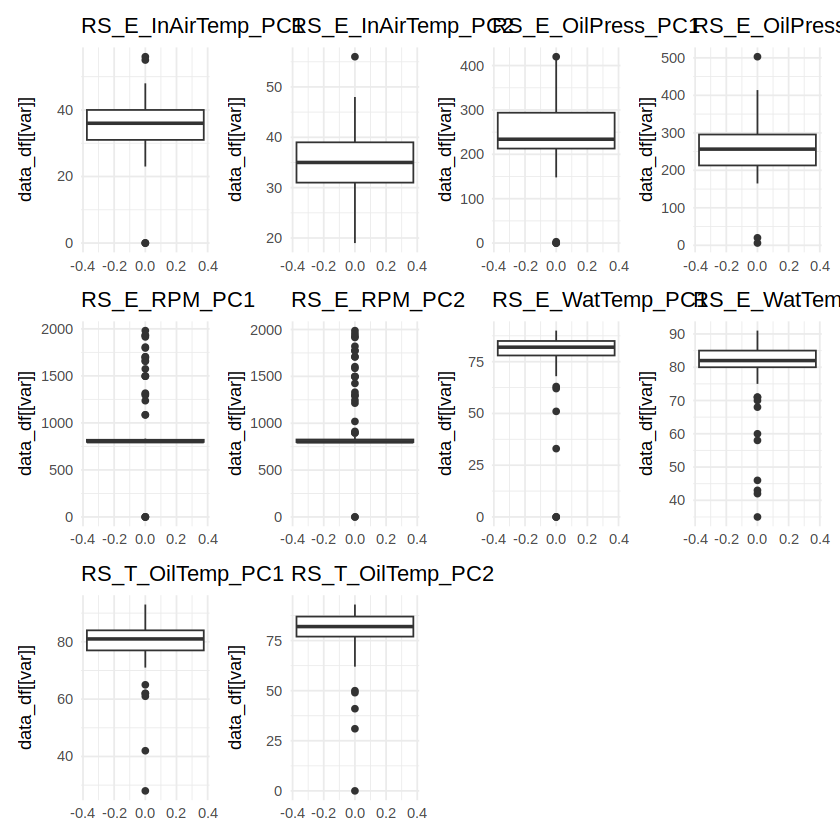

In [13]:
# Create a list to store the box plots
box_plots <- lapply(selected_vars, function(var) {
  ggplot(data_df, aes(y = data_df[[var]])) +
    geom_boxplot() +
    labs(title = var) +
    theme_minimal()
})

# Arrange the box plots using the `+` operator
arranged_plots <- box_plots[[1]]
for (i in 2:length(box_plots)) {
  arranged_plots <- arranged_plots + box_plots[[i]]
}

# Print the arranged box plots
arranged_plots

In [25]:
# Load required libraries
library(dplyr)
library(ggplot2)
library(outliers)

# Example data
set.seed(123)
data_split <- strsplit(as.character(data$X.mapped_veh_id.timestamps_UTC.lat.lon.RS_E_InAirTemp_PC1.RS_E_InAirTemp_PC2.RS_E_OilPress_PC1.RS_E_OilPress_PC2.RS_E_RPM_PC1.RS_E_RPM_PC2.RS_E_WatTemp_PC1.RS_E_WatTemp_PC2.RS_T_OilTemp_PC1.RS_T_OilTemp_PC2), ";")
data_df <- as.data.frame(do.call(rbind, data_split))

# Variables to analyze for outliers
selected_vars <- c("lat", "lon", "RS_E_InAirTemp_PC1", "RS_E_InAirTemp_PC2", "RS_E_OilPress_PC1", "RS_E_OilPress_PC2", "RS_E_RPM_PC1", "RS_E_RPM_PC2", "RS_E_WatTemp_PC1", "RS_E_WatTemp_PC2", "RS_T_OilTemp_PC1", "RS_T_OilTemp_PC2")

colnames(data_df) <- selected_vars

# Z-score method
z_scores <- scale(data_df)
z_outliers <- rowSums(abs(z_scores) > 2) > 0  # You can adjust the threshold

# IQR method
iqr_outliers <- apply(data_df, 1, function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  return(any(x < (Q1 - 1.5 * IQR) | x > (Q3 + 1.5 * IQR)))
})

# Grubbs' test
grubbs_outliers <- as.logical(apply(data_df, 1, function(x) grubbs.test(x, type = 10, opposite = TRUE)$out))

# Combine the results from different methods
combined_outliers <- z_outliers | iqr_outliers | grubbs_outliers

# Identify the rows with outliers
outlier_rows <- data_df[combined_outliers, ]

# Print the rows with outliers
print(outlier_rows)


ERROR: Error in names(x) <- value: 'names' attribute [12] must be the same length as the vector [0]
